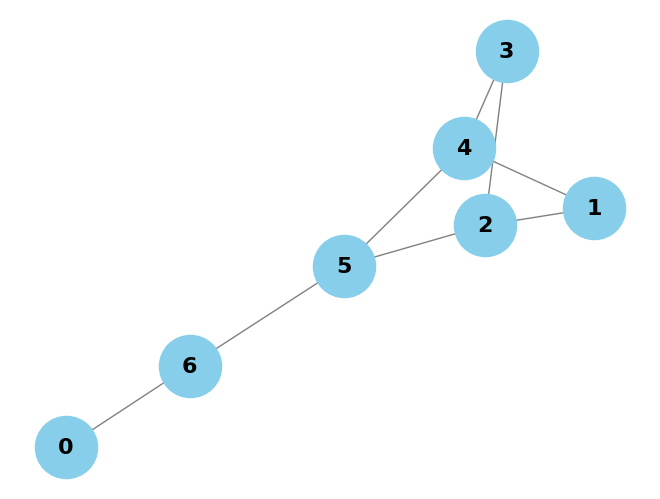

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple graph with 7 nodes
G = nx.Graph()
G.add_nodes_from(range(7))  # Add 7 nodes

# Add some edges between the nodes
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 0), (1, 4), (2, 5)]
G.add_edges_from(edges)

# Draw the updated graph with edges
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_weight='bold', edge_color='gray')
plt.show()


c:\Users\richa\Desktop\CodingWorkspaces\CS190J-sections-code\graph_env\Lib\site-packages\scipy\cluster\hierarchy.py:2820: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


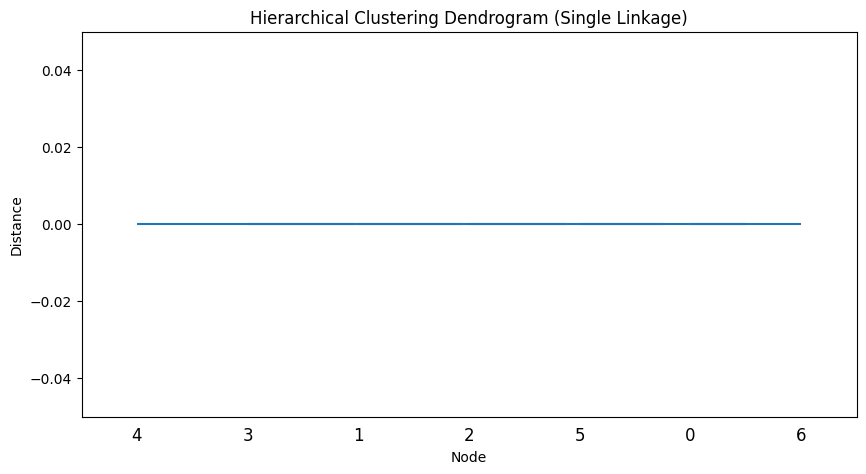

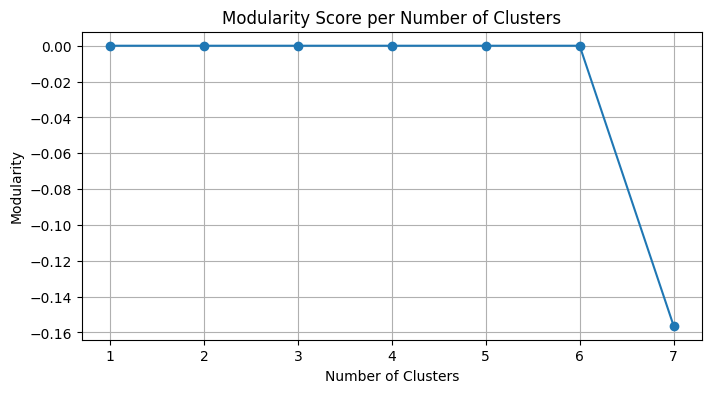

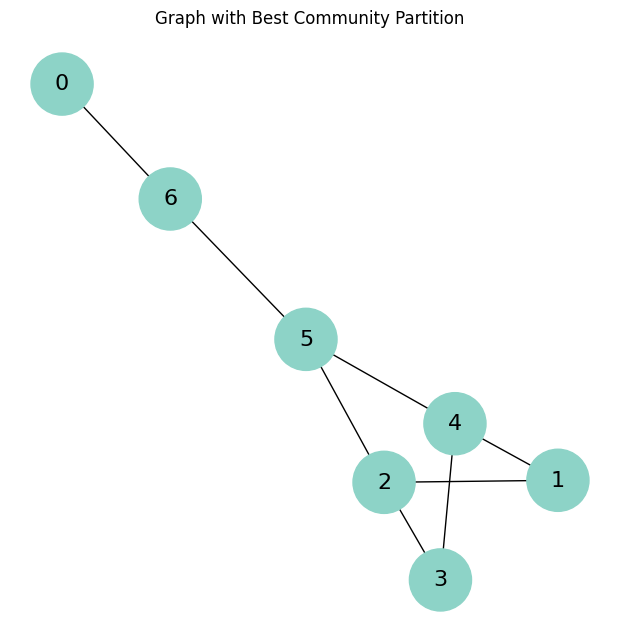

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from networkx.algorithms.community.quality import modularity
from itertools import combinations
import numpy as np

# Compute adjacency matrix
A = nx.to_numpy_array(G)

# Convert adjacency matrix to a distance matrix for clustering: 1 - adjacency
distance_matrix = 1 - A
# Condensed distance matrix required by linkage (upper triangle)
condensed_dist = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]

# Perform single linkage hierarchical clustering
Z = linkage(condensed_dist, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=list(G.nodes()))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Node")
plt.ylabel("Distance")
plt.show()

# Track modularity at each iteration by flattening into k clusters
modularity_scores = []
partitions = []

for t in range(1, G.number_of_nodes() + 1):
    cluster_labels = fcluster(Z, t, criterion='maxclust')
    # Convert cluster labels to communities format
    communities = [[] for _ in range(t)]
    for node, label in zip(G.nodes(), cluster_labels):
        communities[label - 1].append(node)
    partitions.append(communities)
    modularity_scores.append(modularity(G, communities))

# Plot modularity score per iteration
plt.figure(figsize=(8, 4))
plt.plot(range(1, G.number_of_nodes() + 1), modularity_scores, marker='o')
plt.title("Modularity Score per Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Modularity")
plt.grid(True)
plt.show()

# Show final graph with best partition
best_partition = partitions[np.argmax(modularity_scores)]
color_map = {}
for i, community in enumerate(best_partition):
    for node in community:
        color_map[node] = i
colors = [color_map[node] for node in G.nodes()]

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set3, node_size=2000, font_size=16)
plt.title("Graph with Best Community Partition")
plt.show()

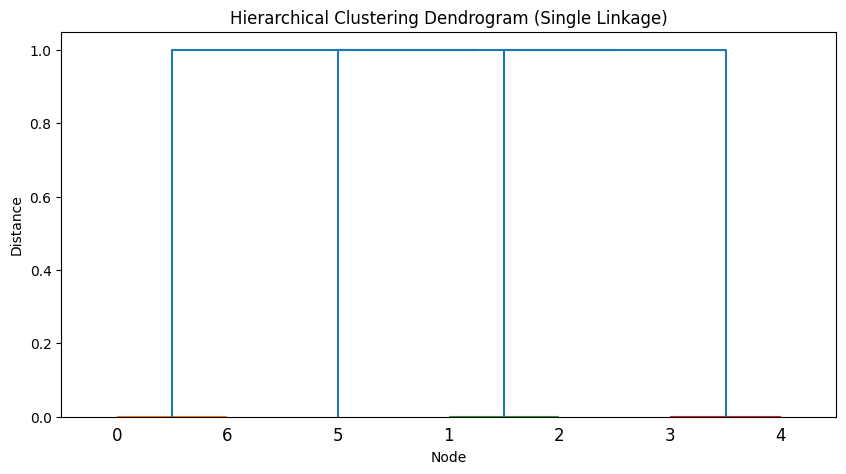

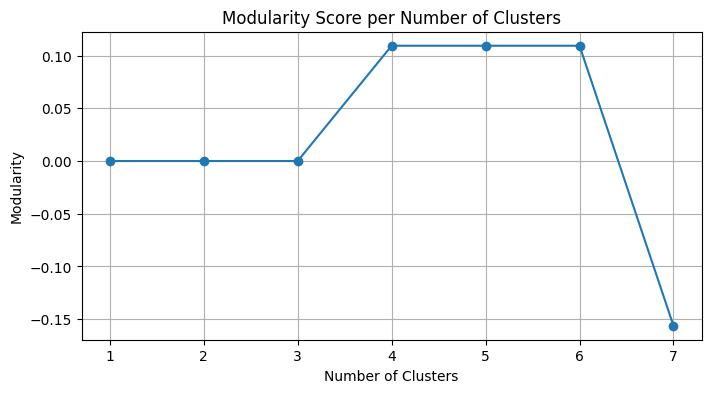

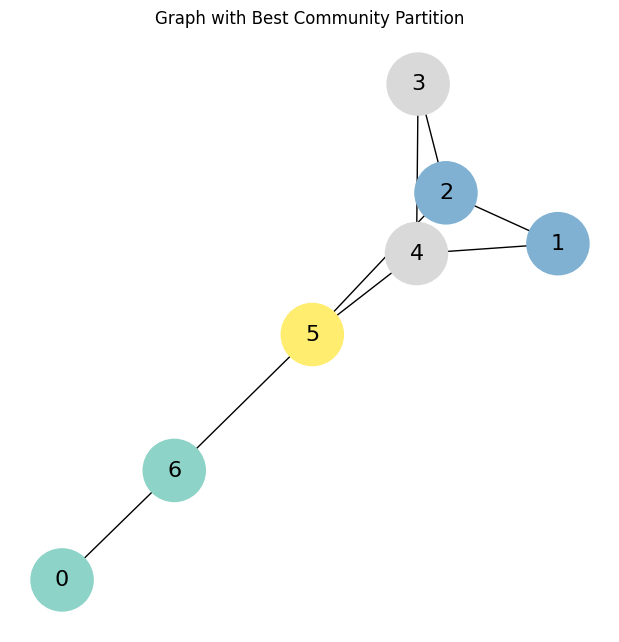

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from networkx.algorithms.community.quality import modularity
from itertools import combinations
import numpy as np

# Compute adjacency matrix
A = nx.to_numpy_array(G)

# Convert adjacency matrix to a distance matrix for clustering: 1 - adjacency
distance_matrix = 1 - A
# Condensed distance matrix required by linkage (upper triangle)
condensed_dist = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]

# Perform single linkage hierarchical clustering
Z = linkage(condensed_dist, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=list(G.nodes()))
plt.title("Hierarchical Clustering Dendrogram (complete Linkage)")
plt.xlabel("Node")
plt.ylabel("Distance")
plt.show()

# Track modularity at each iteration by flattening into k clusters
modularity_scores = []
partitions = []

for t in range(1, G.number_of_nodes() + 1):
    cluster_labels = fcluster(Z, t, criterion='maxclust')
    # Convert cluster labels to communities format
    communities = [[] for _ in range(t)]
    for node, label in zip(G.nodes(), cluster_labels):
        communities[label - 1].append(node)
    partitions.append(communities)
    modularity_scores.append(modularity(G, communities))

# Plot modularity score per iteration
plt.figure(figsize=(8, 4))
plt.plot(range(1, G.number_of_nodes() + 1), modularity_scores, marker='o')
plt.title("Modularity Score per Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Modularity")
plt.grid(True)
plt.show()

# Show final graph with best partition
best_partition = partitions[np.argmax(modularity_scores)]
color_map = {}
for i, community in enumerate(best_partition):
    for node in community:
        color_map[node] = i
colors = [color_map[node] for node in G.nodes()]

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set3, node_size=2000, font_size=16)
plt.title("Graph with Best Community Partition")
plt.show()

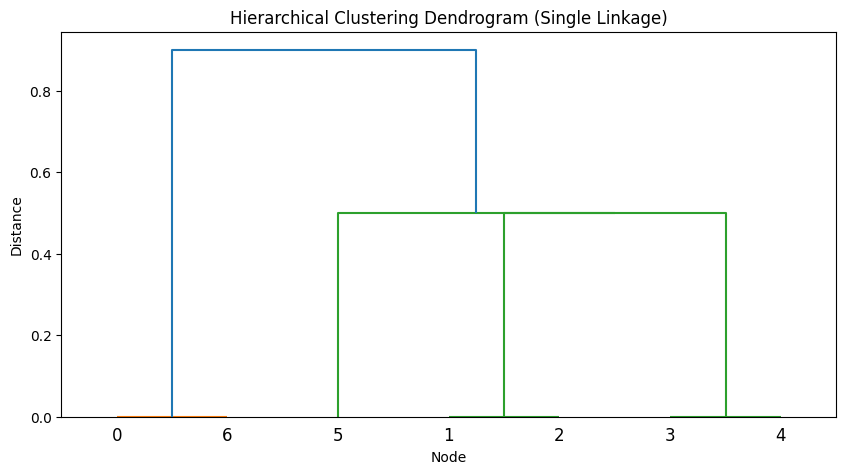

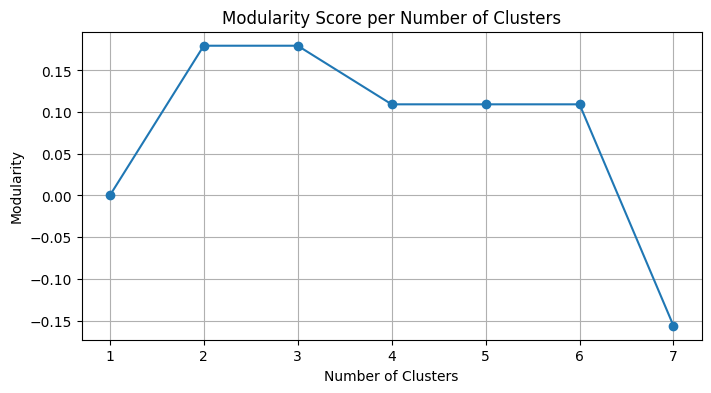

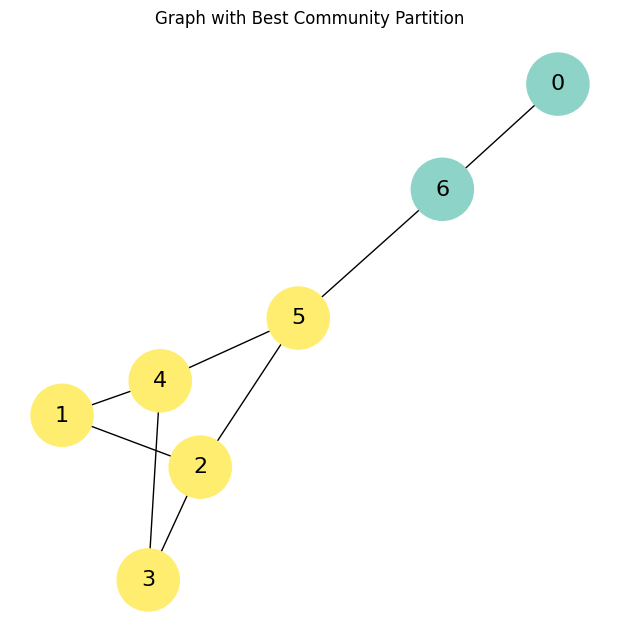

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from networkx.algorithms.community.quality import modularity
from itertools import combinations
import numpy as np

# Compute adjacency matrix
A = nx.to_numpy_array(G)

# Convert adjacency matrix to a distance matrix for clustering: 1 - adjacency
distance_matrix = 1 - A
# Condensed distance matrix required by linkage (upper triangle)
condensed_dist = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]

# Perform single linkage hierarchical clustering
Z = linkage(condensed_dist, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=list(G.nodes()))
plt.title("Hierarchical Clustering Dendrogram (average Linkage)")
plt.xlabel("Node")
plt.ylabel("Distance")
plt.show()

# Track modularity at each iteration by flattening into k clusters
modularity_scores = []
partitions = []

for t in range(1, G.number_of_nodes() + 1):
    cluster_labels = fcluster(Z, t, criterion='maxclust')
    # Convert cluster labels to communities format
    communities = [[] for _ in range(t)]
    for node, label in zip(G.nodes(), cluster_labels):
        communities[label - 1].append(node)
    partitions.append(communities)
    modularity_scores.append(modularity(G, communities))

# Plot modularity score per iteration
plt.figure(figsize=(8, 4))
plt.plot(range(1, G.number_of_nodes() + 1), modularity_scores, marker='o')
plt.title("Modularity Score per Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Modularity")
plt.grid(True)
plt.show()

# Show final graph with best partition
best_partition = partitions[np.argmax(modularity_scores)]
color_map = {}
for i, community in enumerate(best_partition):
    for node in community:
        color_map[node] = i
colors = [color_map[node] for node in G.nodes()]

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set3, node_size=2000, font_size=16)
plt.title("Graph with Best Community Partition")
plt.show()

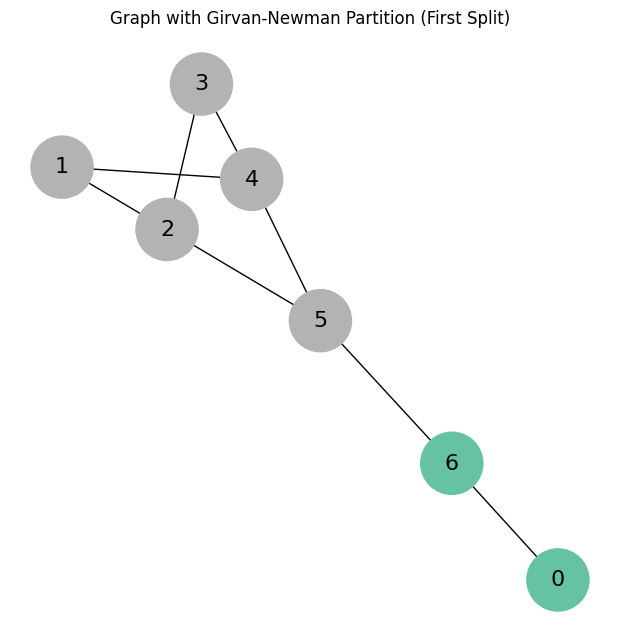

In [21]:
from networkx.algorithms.community import girvan_newman

# Generate communities using the Girvan-Newman algorithm
gn_communities_generator = girvan_newman(G)

# Get the first partition (i.e., splitting the graph into two communities)
first_partition = next(gn_communities_generator)

# Convert to list of lists
gn_communities = [list(c) for c in first_partition]

# Assign colors to nodes based on community
gn_color_map = {}
for i, community in enumerate(gn_communities):
    for node in community:
        gn_color_map[node] = i
gn_colors = [gn_color_map[node] for node in G.nodes()]

# Draw the graph with Girvan-Newman partition
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color=gn_colors, cmap=plt.cm.Set2, node_size=2000, font_size=16)
plt.title("Graph with Girvan-Newman Partition (First Split)")
plt.show()

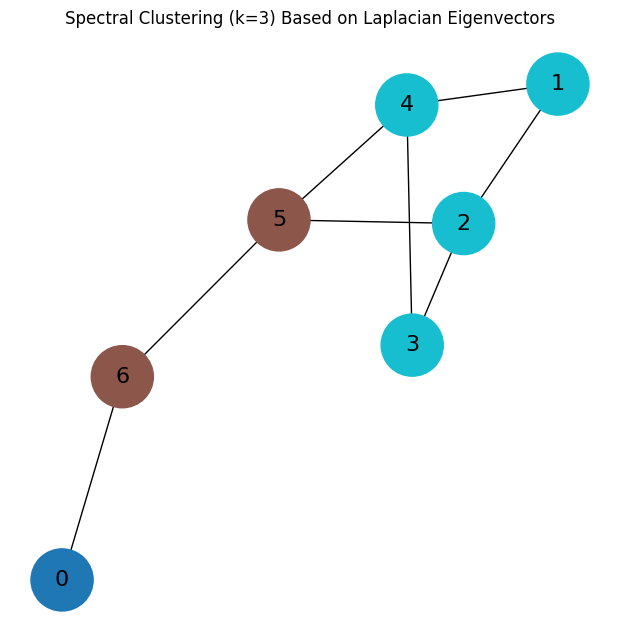

In [24]:
from sklearn.cluster import KMeans
from scipy.linalg import eigh

# Step 1: Construct similarity matrix W (adjacency matrix for unweighted graph)
W = nx.to_numpy_array(G)

# Step 2: Compute the Laplacian L = D - W
D = np.diag(W.sum(axis=1))  # Degree matrix
L = D - W

# Step 3: Compute the k smallest eigenvectors of L
k = 3  # number of clusters
eigvals, eigvecs = eigh(L)  # eigh is for symmetric matrices (Laplacian is symmetric)
V = eigvecs[:, 1:k+1]  # skip the first eigenvector (corresponding to eigenvalue 0)

# Step 4: Cluster rows in V using k-means
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
labels = kmeans.fit_predict(V)

# Draw the graph with spectral clustering result
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color=labels, cmap=plt.cm.tab10, node_size=2000, font_size=16)
plt.title("Spectral Clustering (k=3) Based on Laplacian Eigenvectors")
plt.show()